In [1]:
#Basic setup
from ugot import ugot
got=ugot.UGOT()
got.initialize('192.168.1.29')

192.168.1.29:50051


In [ ]:
#Drive in a straight line
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)
got.mecanum_turn_speed_times(turn=3,speed=45,times=180,unit=2)
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)
got.mecanum_turn_speed_times(turn=3,speed=45,times=180,unit=2)

In [ ]:
#Drive in a square v1.1
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)
got.mecanum_turn_speed_times(turn=3,speed=45,times=90,unit=2)
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)
got.mecanum_turn_speed_times(turn=3,speed=45,times=90,unit=2)
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)
got.mecanum_turn_speed_times(turn=3,speed=45,times=90,unit=2)
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)
got.mecanum_turn_speed_times(turn=3,speed=45,times=90,unit=2)

In [ ]:
#Drive in a square v1.2
for i in range(4):
    got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)
    got.mecanum_turn_speed_times(turn=3,speed=45,times=90,unit=2)

In [ ]:
#Drive in a square v2
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)
got.mecanum_translate_speed_times(angle=90,speed=30,times=70,unit=1)
got.mecanum_translate_speed_times(angle=180,speed=30,times=70,unit=1)
got.mecanum_translate_speed_times(angle=-90,speed=30,times=70,unit=1)

In [ ]:
import time

scanned=False

#Load the models and pick up the object
got.load_models(['apriltag_qrcode'])
got.mechanical_clamp_release()
time.sleep(1)
got.mechanical_clamp_close()
time.sleep(1)

#Drive to the apriltag
got.mecanum_translate_speed_times(angle=0,speed=40,times=100,unit=1)
got.mecanum_turn_speed_times(turn=2,speed=45,times=90,unit=2)
while not scanned:
    results=got.get_apriltag_total_info()
    if results:
        scanned=True
        got.play_tone(tone="C5",beat=4,wait=True)


In [ ]:
#Slightly more advanced version
#This scans for the apriltag and then drives to it
scanned=False

while not scanned:
    results=got.get_apriltag_total_info()
    got.mecanum_translate_speed(angle=90,speed=20)
    if results:
        got.mecanum_stop()
        scanned=True
        got.mechanical_clamp_release()
        got.play_tone(tone="C5",beat=4,wait=True)

In [ ]:
#Straight movement
got.mecanum_translate_speed_times(angle=0,speed=30,times=70,unit=1)

#Turning movement
got.mecanum_turn_speed_times(turn=3,speed=45,times=180,unit=2)

#Load models
got.load_models(['apriltag_qrcode'])

#Release the object
got.mechanical_clamp_release()

#Close the clamp
got.mechanical_clamp_close()

#Get the apriltag info
got.get_apriltag_total_info()

#Play a tone
got.play_tone(tone="C5",beat=4,wait=True)

#More advanced__________________________________________________________
#Movement without duration
got.mecanum_translate_speed(angle=90,speed=20)

#Stop the robot
got.mecanum_stop()

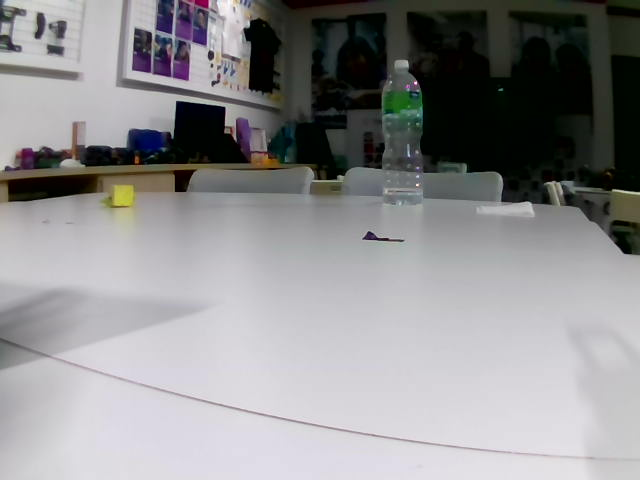

Done


In [7]:
# Camera
import numpy as np
import cv2
from IPython.display import display, clear_output
from PIL import Image

got.load_models(['apriltag_qrcode'])

got.open_camera()

try:
    while True:
        frame = got.read_camera_data()
        if frame is not None:
            results=got.get_apriltag_total_info()

            nparr = np.frombuffer(frame, np.uint8)
            img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

            if results:
                c_x, c_y = int(results[0][1]), int(results[0][2])
                h, w = int(results[0][3]), int(results[0][4])

                # cv2.rectangle(image, start point, end point, color, thickness)
                cv2.rectangle(img, (c_x - w // 2, c_y - h //2), 
                            (c_x + w // 2, c_y + h // 2), (0, 255, 0), 3)

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            img_pil = Image.fromarray(img_rgb)

            clear_output(wait=True)
            display(img_pil)
except KeyboardInterrupt:
    print("Done")
    got.mecanum_stop()